In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from reasonlib import readRnxNavFile

In [2]:
# rinex data
url = 'https://igs.bkg.bund.de/root_ftp/IGS/BRDC/2020/121/BRDM00DLR_S_20201210000_01D_MN.rnx.gz'
fin=url.split('/')[-1].split('?')[0]

# import urllib
# urllib.request.urlretrieve(url, fin)

In [3]:
# parse header and data
h,d = readRnxNavFile(fin)


In [4]:
#header
h

['     3.04           NAVIGATION DATA     M (Mixed)           RINEX VERSION / TYPE',
 'BCEmerge            congo               20200501 004604 GMT PGM / RUN BY / DATE ',
 'Merged GPS/GLO/GAL/BDS/QZS/SBAS/IRNSS navigation file       COMMENT ',
 'based on CONGO and MGEX tracking data                       COMMENT ',
 'DLR/GSOC: O. Montenbruck; P. Steigenberger                  COMMENT ',
 'GAGP  3.7543941289e-09-2.664535259e-15 345600 2103          TIME SYSTEM CORR    ',
 'GAUT  0.0000000000e+00 0.000000000e+00 259200 2103          TIME SYSTEM CORR    ',
 'GLUT  4.6566128731e-10 0.000000000e+00 259200 2103          TIME SYSTEM CORR    ',
 'GPUT  9.3132257462e-10 1.776356839e-15 589824 2103          TIME SYSTEM CORR    ',
 'QZUT -9.3132257462e-09 0.000000000e+00 528384 2103          TIME SYSTEM CORR    ',
 '    18                                                      LEAP SECONDS        ',
 '                                                            END OF HEADER       ']

In [5]:
len(d)

18782

In [6]:
# data frame
df = pd.DataFrame(d)
df.shape

(18782, 38)

In [7]:
# number of satellites
len(df[0].unique())

148

In [8]:
# list of satellites
df[0].unique()

array(['G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09',
       'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18',
       'G19', 'G20', 'G21', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27',
       'G28', 'G29', 'G30', 'G31', 'G32', 'S22', 'S23', 'S25', 'S27',
       'S28', 'S30', 'S31', 'S33', 'S36', 'S37', 'S38', 'S40', 'S44',
       'R01', 'R02', 'R03', 'R04', 'R05', 'R06', 'R07', 'R08', 'R09',
       'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16', 'R17', 'R18',
       'R19', 'R20', 'R21', 'R22', 'R23', 'R24', 'R26', 'E01', 'E02',
       'E03', 'E04', 'E05', 'E07', 'E08', 'E09', 'E11', 'E12', 'E13',
       'E14', 'E15', 'E18', 'E19', 'E21', 'E24', 'E25', 'E26', 'E27',
       'E30', 'E31', 'E33', 'E36', 'C01', 'C02', 'C03', 'C04', 'C05',
       'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14',
       'C16', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26',
       'C27', 'C28', 'C29', 'C30', 'C32', 'C33', 'C34', 'C35', 'C36',
       'C37', 'C38',

In [9]:
# number of messages
df.groupby(df[0].str[0]).count().T

,C,E,G,I,J,R,S
0,1082,4695,394,412,96,1219,10884
1,1082,4695,394,412,96,1219,10884
2,1082,4695,394,412,96,1219,10884
3,1082,4695,394,412,96,1219,10884
4,1082,4695,394,412,96,1219,10884
5,1082,4695,394,412,96,1219,10884
6,1082,4695,394,412,96,1219,10884
7,1082,4695,394,412,96,1219,10884
8,1082,4695,394,412,96,1219,10884
9,1082,4695,394,412,96,1219,10884


In [10]:
# all constellation messages
hasGal = df[0].str[0] == 'E'
df[hasGal].head().T

,12497,12498,12499,12500,12501
0,E01,E01,E01,E01,E01
1,2020,2020,2020,2020,2020
2,4,4,4,4,4
3,30,30,30,30,30
4,0,1,1,1,2
5,50,0,30,40,10
6,0,0,0,0,0
7,-0.000846368,-0.000846373,-0.000846388,-0.000846393,-0.000846407
8,-7.91545e-12,-7.92966e-12,-7.94387e-12,-7.94387e-12,-7.97229e-12
9,0,0,0,0,0


In [11]:
# all messages for one satellites
hasSat = df[0] == 'E01'
df[hasSat].head().T

,12497,12498,12499,12500,12501
0,E01,E01,E01,E01,E01
1,2020,2020,2020,2020,2020
2,4,4,4,4,4
3,30,30,30,30,30
4,0,1,1,1,2
5,50,0,30,40,10
6,0,0,0,0,0
7,-0.000846368,-0.000846373,-0.000846388,-0.000846393,-0.000846407
8,-7.91545e-12,-7.92966e-12,-7.94387e-12,-7.94387e-12,-7.97229e-12
9,0,0,0,0,0


In [12]:
# sources
df[hasSat].groupby(27).count()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
27,,,,,,,,,,,,,,,,,,,,,
258.0,106,106,106,106,106,106,106,106,106,106,...,106,0,106,106,106,106,106,0,0,0
516.0,74,74,74,74,74,74,74,74,74,74,...,74,0,74,74,74,74,74,0,0,0
517.0,34,34,34,34,34,34,34,34,34,34,...,34,0,34,34,34,34,34,0,0,0


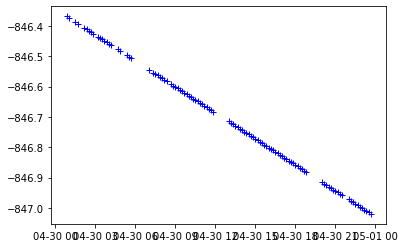

In [13]:
# plot clock bias for one galileo satellite using F/NAV nav data
has_sat = df[0] == 'E01'
has_source = df[27] == 258
m = has_sat & has_source
A = df[m]

cols = ['year', 'month', 'day', 'hour', 'minute', 'second']
cols = {k+1:v for k,v in enumerate(cols)}

x = pd.to_datetime(A.loc[:,1:6].rename(columns=cols))
y = A.loc[:,7]*1e+6 #us

plt.plot(x,y,'+b')

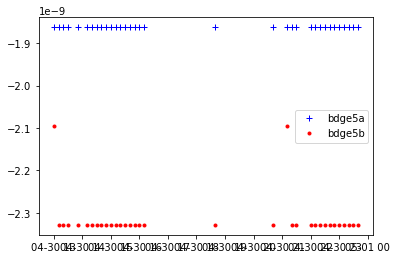

In [14]:
# plot BGD for one galileo satellite as derived from I/NAV data
has_sat = df[0] == 'E01'
has_source = df[27] == 517
m = has_sat & has_source
A = df[m]

cols = ['year', 'month', 'day', 'hour', 'minute', 'second']
cols = {k+1:v for k,v in enumerate(cols)}

x = pd.to_datetime(A.loc[:,1:6].rename(columns=cols))
y = A.loc[:,32]

plt.plot(x,y,'+b', label='bdge5a')
y = A.loc[:,33]
plt.plot(x,y,'.r', label='bdge5b')
plt.legend()

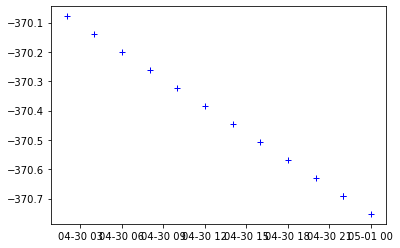

In [15]:
# plot clock bias for one gps satellite
has_sat = df[0] == 'G01'
has_source = df[27] == 1
m = has_sat & has_source
A = df[m]

cols = ['year', 'month', 'day', 'hour', 'minute', 'second']
cols = {k+1:v for k,v in enumerate(cols)}

x = pd.to_datetime(A.loc[:,1:6].rename(columns=cols))
y = A.loc[:,7]*1e+6 #us

plt.plot(x,y,'+b')